In [1]:
# netflix and imdb dataset


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from ast import literal_eval

import warnings



In [3]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
# ! kaggle datasets download datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows
! kaggle datasets download bharatnatrayn/movies-dataset-for-feature-extracion-prediction
# ! kaggle datasets download datasets/bharatnatrayn/movies-dataset-for-feature-extracion-prediction
# ! kaggle datasets download datasets/victorsoeiro/netflix-tv-shows-and-movies

  0% 0.00/1.05M [00:00<?, ?B/s]
100% 1.05M/1.05M [00:00<00:00, 97.8MB/s]


In [5]:
! unzip movies-dataset-for-feature-extracion-prediction

Archive:  movies-dataset-for-feature-extracion-prediction.zip
  inflating: movies.csv              


In [6]:
movies = pd.read_csv('movies.csv')

In [7]:
movies.shape

(9999, 9)

In [8]:
movies.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [9]:
df = movies.copy()
df.drop('Gross', axis = 1, inplace=True)

In [10]:
# remove white spaces
df['MOVIES'] = df['MOVIES'].str.strip()
# return all the dubplicates in the dataset
duplicates = df[df.duplicated(subset=['MOVIES'], keep=False)]
duplicates

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0
...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN


In [11]:
unique_movies_in_duplicate = duplicates['MOVIES'].unique()
unique_movies_in_duplicate_count = len(unique_movies_in_duplicate)
unique_movies_in_duplicate_count

455

In [12]:
duplicates_count = df.duplicated(subset=['MOVIES']).sum()
duplicates_count

3576

In [13]:
# ~ inverts the values recieved from query, .all means for all the columns
mask_non_null = ~df[['RunTime', 'YEAR']].isna().all(axis = 1)
mask_non_null

0       True
1       True
2       True
3       True
4       True
        ... 
9994    True
9995    True
9996    True
9997    True
9998    True
Length: 9999, dtype: bool

In [14]:
df = df.sort_values(by=['YEAR','RunTime'], na_position='last')
# in duplicates if keep = first then the first occurence is set to False and the remaining duplicate occurrences are set to true
movies_df = df[~df.duplicated(subset=['MOVIES'],keep='first') & mask_non_null]

movies_df = movies_df.reset_index(drop=True)
#  drop means old index is dropped.
movies_df

<ipython-input-14-4275d8190c46>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies_df = df[~df.duplicated(subset=['MOVIES'],keep='first') & mask_non_null]


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Söderkåkar,(1932),\nComedy,5.3,\nThe movie version of Gideon Wahlbergs comedy...,\n Director:\nWeyler Hildebrand\n| \n St...,59,87.0
1,Scarface,(1932),"\nAction, Crime, Drama",7.8,\nAn ambitious and nearly insane violent gangs...,"\n Directors:\nHoward Hawks, \nRichard Ross...","26,365",93.0
2,Kära släkten,(1933),\nComedy,5.4,\nThe story about a Stockholm wholesaler and h...,\n Director:\nGustaf Molander\n| \n Star...,36,94.0
3,Karriär,(1938),\nDrama,5.2,\nA traveling theater company in Sweden. Confl...,\n Director:\nSchamyl Bauman\n| \n Stars...,52,106.0
4,Dumbo,(1941),"\nAnimation, Adventure, Drama",7.2,"\nRidiculed because of his enormous ears, a yo...","\n Directors:\nSamuel Armstrong, \nNorman F...","124,409",64.0
...,...,...,...,...,...,...,...,...
6004,Kaos,NaN,"\nComedy, Drama, Fantasy",NaN,\nA modern day contemporary retelling of Greek...,\n,NaN,60.0
6005,Cuckoo Song,NaN,"\nDrama, Horror, Mystery",NaN,"\nIn the haunting aftermath of war, a missing ...",\n,NaN,60.0
6006,Open 24/7,NaN,\nDrama,NaN,\nTake a look into the lives of six people who...,\n,NaN,60.0
6007,Archive 81,NaN,"\nDrama, Horror, Sci-Fi",NaN,\nAdd a Plot\n,"\n Directors:\nRebecca Thomas, \nJames Wan\...",NaN,60.0


In [15]:
# cleaning \n from the rows
movies_df['GENRE'] = movies_df['GENRE'].str.replace('\n', '')
movies_df['ONE-LINE'] = movies_df['ONE-LINE'].str.replace('\n', '')
movies_df['STARS'] = movies_df['STARS'].str.strip()
movies_df['STARS'] = movies_df['STARS'].str.replace('\n', '')

In [16]:
movies_df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Söderkåkar,(1932),Comedy,5.3,The movie version of Gideon Wahlbergs comedy a...,Director:Weyler Hildebrand| Stars:Gideon W...,59,87.0
1,Scarface,(1932),"Action, Crime, Drama",7.8,An ambitious and nearly insane violent gangste...,"Directors:Howard Hawks, Richard Rosson| St...","26,365",93.0
2,Kära släkten,(1933),Comedy,5.4,The story about a Stockholm wholesaler and his...,Director:Gustaf Molander| Stars:Gösta Ekma...,36,94.0
3,Karriär,(1938),Drama,5.2,A traveling theater company in Sweden. Conflic...,Director:Schamyl Bauman| Stars:Signe Hasso...,52,106.0
4,Dumbo,(1941),"Animation, Adventure, Drama",7.2,"Ridiculed because of his enormous ears, a youn...","Directors:Samuel Armstrong, Norman Ferguson, W...","124,409",64.0
...,...,...,...,...,...,...,...,...
6004,Kaos,NaN,"Comedy, Drama, Fantasy",NaN,A modern day contemporary retelling of Greek m...,,NaN,60.0
6005,Cuckoo Song,NaN,"Drama, Horror, Mystery",NaN,"In the haunting aftermath of war, a missing gi...",,NaN,60.0
6006,Open 24/7,NaN,Drama,NaN,Take a look into the lives of six people who w...,,NaN,60.0
6007,Archive 81,NaN,"Drama, Horror, Sci-Fi",NaN,Add a Plot,"Directors:Rebecca Thomas, James Wan| Stars...",NaN,60.0


In [17]:
def extract_names(row):
  directors = ','.join(re.findall(r'Director[s]*:\s*[^|]+',row))
  stars = ','.join(re.findall(r'Star[s]*:\s*[^|]+',row))
  # print(directors,stars)
  return directors, stars

movies_df[['DIRECTOR', 'STARS']] = movies_df['STARS'].apply(extract_names).apply(pd.Series)
# .apply(pd.Series) converts it to a series ehere each element of the tple returned from extract_names becomes a column
movies_df['DIRECTOR'] = movies_df['DIRECTOR'].str.strip()
movies_df['STARS'] = movies_df['STARS'].str.strip()

movies_df


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,DIRECTOR
0,Söderkåkar,(1932),Comedy,5.3,The movie version of Gideon Wahlbergs comedy a...,"Stars:Gideon Wahlberg, Dagmar Ebbesen, Björn B...",59,87.0,Director:Weyler Hildebrand
1,Scarface,(1932),"Action, Crime, Drama",7.8,An ambitious and nearly insane violent gangste...,"Stars:Paul Muni, Ann Dvorak, Karen Morley, Osg...","26,365",93.0,"Directors:Howard Hawks, Richard Rosson"
2,Kära släkten,(1933),Comedy,5.4,The story about a Stockholm wholesaler and his...,"Stars:Gösta Ekman, Tutta Rolf, Carl Barcklind,...",36,94.0,Director:Gustaf Molander
3,Karriär,(1938),Drama,5.2,A traveling theater company in Sweden. Conflic...,"Stars:Signe Hasso, Sture Lagerwall, Tollie Zel...",52,106.0,Director:Schamyl Bauman
4,Dumbo,(1941),"Animation, Adventure, Drama",7.2,"Ridiculed because of his enormous ears, a youn...","Stars:Sterling Holloway, Edward Brophy, Herman...","124,409",64.0,"Directors:Samuel Armstrong, Norman Ferguson, W..."
...,...,...,...,...,...,...,...,...,...
6004,Kaos,NaN,"Comedy, Drama, Fantasy",NaN,A modern day contemporary retelling of Greek m...,,NaN,60.0,
6005,Cuckoo Song,NaN,"Drama, Horror, Mystery",NaN,"In the haunting aftermath of war, a missing gi...",,NaN,60.0,
6006,Open 24/7,NaN,Drama,NaN,Take a look into the lives of six people who w...,,NaN,60.0,
6007,Archive 81,NaN,"Drama, Horror, Sci-Fi",NaN,Add a Plot,"Stars:Evan Jonigkeit, Dina Shihabi, Matt McGor...",NaN,60.0,"Directors:Rebecca Thomas, James Wan"


In [18]:
movies_df['DIRECTOR'] = movies_df['DIRECTOR'].str.replace('Director:', '')
movies_df['DIRECTOR'] = movies_df['DIRECTOR'].str.replace('Directors:', '')
movies_df['STARS'] = movies_df['STARS'].str.replace('Star:', '')

In [19]:
movies_df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,DIRECTOR
0,Söderkåkar,(1932),Comedy,5.3,The movie version of Gideon Wahlbergs comedy a...,"Stars:Gideon Wahlberg, Dagmar Ebbesen, Björn B...",59,87.0,Weyler Hildebrand
1,Scarface,(1932),"Action, Crime, Drama",7.8,An ambitious and nearly insane violent gangste...,"Stars:Paul Muni, Ann Dvorak, Karen Morley, Osg...","26,365",93.0,"Howard Hawks, Richard Rosson"
2,Kära släkten,(1933),Comedy,5.4,The story about a Stockholm wholesaler and his...,"Stars:Gösta Ekman, Tutta Rolf, Carl Barcklind,...",36,94.0,Gustaf Molander
3,Karriär,(1938),Drama,5.2,A traveling theater company in Sweden. Conflic...,"Stars:Signe Hasso, Sture Lagerwall, Tollie Zel...",52,106.0,Schamyl Bauman
4,Dumbo,(1941),"Animation, Adventure, Drama",7.2,"Ridiculed because of his enormous ears, a youn...","Stars:Sterling Holloway, Edward Brophy, Herman...","124,409",64.0,"Samuel Armstrong, Norman Ferguson, Wilfred Jac..."
...,...,...,...,...,...,...,...,...,...
6004,Kaos,NaN,"Comedy, Drama, Fantasy",NaN,A modern day contemporary retelling of Greek m...,,NaN,60.0,
6005,Cuckoo Song,NaN,"Drama, Horror, Mystery",NaN,"In the haunting aftermath of war, a missing gi...",,NaN,60.0,
6006,Open 24/7,NaN,Drama,NaN,Take a look into the lives of six people who w...,,NaN,60.0,
6007,Archive 81,NaN,"Drama, Horror, Sci-Fi",NaN,Add a Plot,"Stars:Evan Jonigkeit, Dina Shihabi, Matt McGor...",NaN,60.0,"Rebecca Thomas, James Wan"


In [20]:
movies_df.isnull().sum()

MOVIES        0
YEAR         19
GENRE        34
RATING      498
ONE-LINE      0
STARS         0
VOTES       498
RunTime     889
DIRECTOR      0
dtype: int64

In [21]:
movies_df['VOTES'] = movies_df['VOTES'].str.replace(',','').astype(float)
mean_ratings = movies_df['RATING'].mean()
mean_votes = movies_df['VOTES'].mean()

movies_df['RATING'] = movies_df['RATING'].fillna(mean_ratings)
movies_df['VOTES'] = movies_df['VOTES'].fillna(mean_votes)

# movies_df['VOTES'] = movies_df['VOTES'].round().astype(float)
# movies_df['RATING'] = movies_df['RATING'].round().astype(float)

In [22]:
movies_df['VOTES']
# mean_ratings

0           59.000000
1        26365.000000
2           36.000000
3           52.000000
4       124409.000000
            ...      
6004     20830.169479
6005     20830.169479
6006     20830.169479
6007     20830.169479
6008     20830.169479
Name: VOTES, Length: 6009, dtype: float64

In [23]:
movies_df['VOTES'] = movies_df['VOTES'].astype(str)
movies_df['VOTES'] = movies_df['VOTES'].str.replace(',', '').astype(float)

mean_ratings = movies_df.groupby('DIRECTOR')['RATING'].transform('mean')
mean_votes = movies_df.groupby('DIRECTOR')['VOTES'].transform('mean')

# Fill missing values in 'RATING' and 'VOTES' columns
movies_df['RATING'].fillna(mean_ratings, inplace=True)
movies_df['VOTES'].fillna(mean_votes.median(), inplace=True)

# Convert 'VOTES' column to float and round
movies_df['VOTES'] = movies_df['VOTES'].round().astype(float)
movies_df['RATING'] = movies_df['RATING'].round().astype(float)

movies_df.isnull().sum()

MOVIES        0
YEAR         19
GENRE        34
RATING        0
ONE-LINE      0
STARS         0
VOTES         0
RunTime     889
DIRECTOR      0
dtype: int64

In [24]:
top_10_movies = movies_df.sort_values(by='RATING',ascending=False).head(10)
top_10_movies

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,DIRECTOR
1161,House of Cards,(2013–2018),Drama,9.0,A Congressman works with his equally conniving...,"Stars:Kevin Spacey, Michel Gill, Robin Wright,...",476656.0,51.0,
128,Bill Hicks: Revelations,(1993 TV Special),"Documentary, Comedy",9.0,Bill Hicks in the height of his genius. Record...,Bill Hicks,2983.0,57.0,Chris Bould
622,Fake or Fortune?,(2010– ),Documentary,9.0,Journalist Fiona Bruce teams up with art exper...,"Stars:Fiona Bruce, Philip Mould, Bendor Grosve...",504.0,63.0,
4821,Lenox Hill,(2020),Documentary,9.0,An intimate look at the lives of four doctors ...,"Stars:John Boockvar, David Langer, Amanda Litt...",2044.0,NaN,
258,The Lord of the Rings: The Return of the King,(2003),"Action, Adventure, Drama",9.0,Gandalf and Aragorn lead the World of Men agai...,"Stars:Elijah Wood, Viggo Mortensen, Ian McKell...",1691777.0,201.0,Peter Jackson
122,Bill Hicks: Relentless,(1992 Video),"Documentary, Comedy",9.0,Bill Hicks tells us how he feels about non-smo...,Bill Hicks,2425.0,61.0,Chris Bould
624,Tromba Trem,(2010– ),"Animation, Adventure, Comedy",9.0,Add a Plot,"Stars:Roberto Rodrigues, Maira Kesten, Maria R...",40.0,NaN,
4815,The Last Dance,(2020),"Documentary, Biography, History",9.0,"Charting the rise of the 1990's Chicago Bulls,...","Stars:Phil Jackson, Michael Jordan, David Aldr...",93041.0,491.0,
5108,Bo Burnham: Inside,(2021 TV Special),"Comedy, Drama, Music",9.0,A musical comedy special shot and performed by...,"Stars:Bo Burnham, Socko",31108.0,87.0,Bo Burnham
909,Art of Flight: The Series,(2012– ),Documentary,9.0,A seven-episode TV series that focuses on the ...,"Stars:Mark Landvik, Curt Morgan, Travis Rice, ...",189.0,NaN,


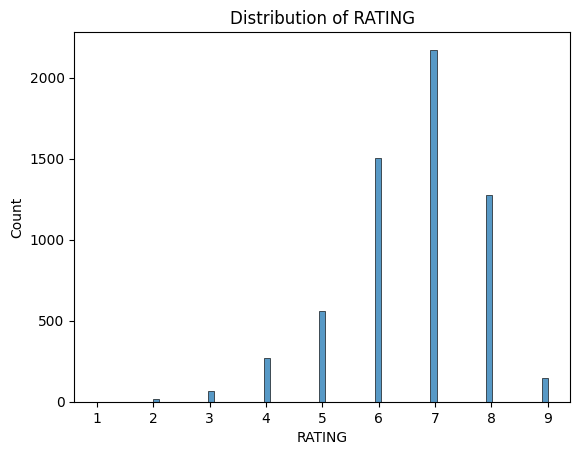

In [25]:
#  data visualization
sns.histplot(movies_df['RATING'])
plt.xlabel('RATING')
plt.title('Distribution of RATING')
plt.show()

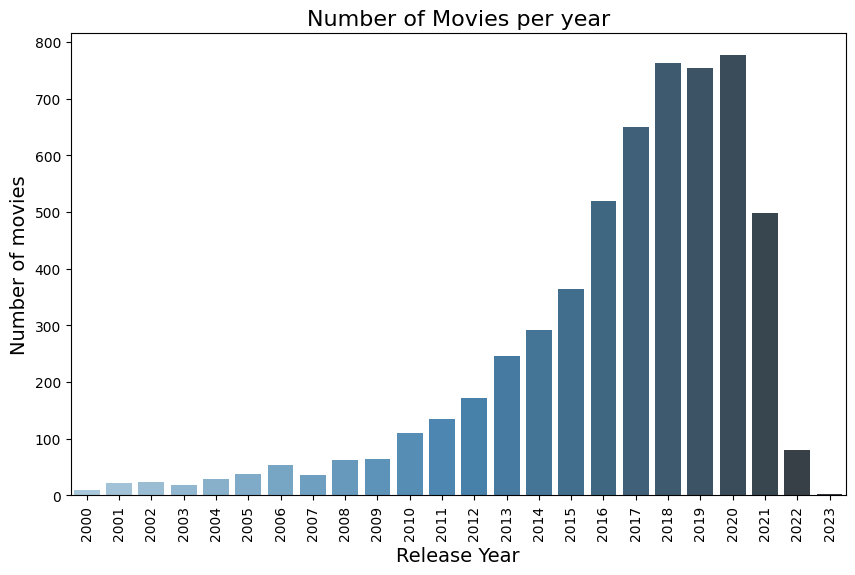

In [26]:
df_year = movies_df.copy()
df_year['RELEASE_YEAR_START'] = df_year['YEAR'].str.extract(r'(\d{4})')[0]
df_year['RELEASE_YEAR_END'] = df_year['YEAR'].str.extract(r'(\d{4})-(\d{4})')[1]

df_year['RELEASE_YEAR_START'].fillna('0', inplace=True)
df_year['RELEASE_YEAR_END'].fillna('0', inplace=True)

df_year = df_year[(df_year['RELEASE_YEAR_START'].astype(int) >= 2000) & (df_year['RELEASE_YEAR_END'].astype(int) <=2023)]

plt.figure(figsize=(10,6))
sns.countplot(data=df_year, x='RELEASE_YEAR_START', palette = 'Blues_d')
plt.title('Number of Movies per year', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of movies', fontsize=14)
plt.xticks(rotation=90)
plt.show()

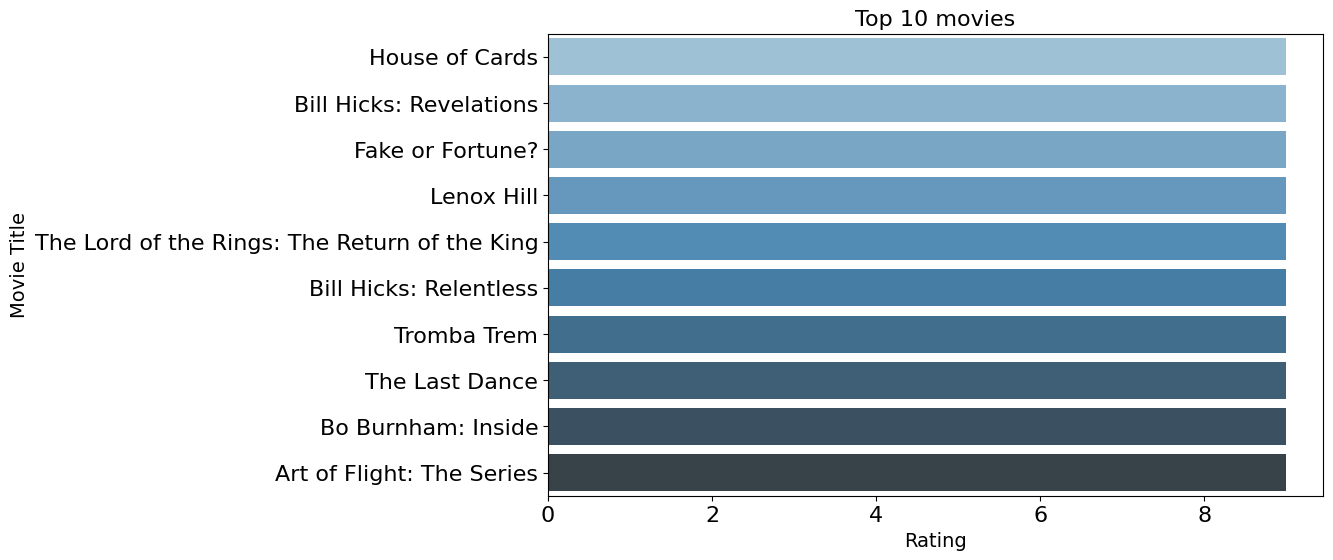

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_movies, x='RATING', y='MOVIES', palette='Blues_d')
plt.title(f'Top 10 movies', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Movie Title', fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [28]:
lineplot_df = movies_df.copy()

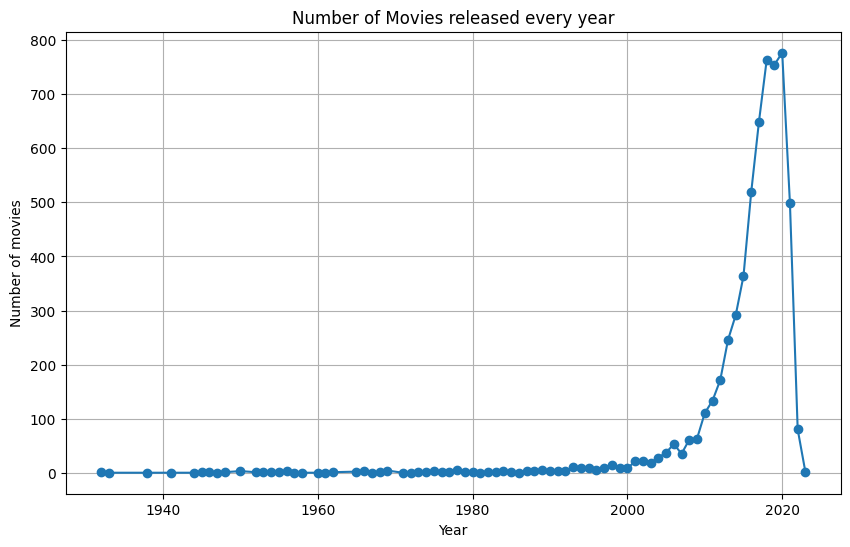

In [29]:
lineplot_df['YEAR'] = lineplot_df['YEAR'].str.extract(r'(\d{4})', expand=False)

lineplot_df['YEAR'] = lineplot_df['YEAR'].astype(float).astype('Int64')

lineplot_df

lineplot_df = lineplot_df[lineplot_df['YEAR'] <= 2023]

lineplot_df = lineplot_df.dropna(subset=['YEAR'])

movies_per_year = lineplot_df['YEAR'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')

plt.title('Number of Movies released every year')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.grid(True)
plt.show()

In [30]:
# movies_df['RATING'] = movies_df['RATING'].fillna(mean_ratings,inplace=True)

In [31]:
movies_df['RATING'].tail(10)

5999    7.0
6000    7.0
6001    7.0
6002    7.0
6003    7.0
6004    7.0
6005    7.0
6006    7.0
6007    7.0
6008    7.0
Name: RATING, dtype: float64

In [32]:
movies_df['RATING']

0       5.0
1       8.0
2       5.0
3       5.0
4       7.0
       ... 
6004    7.0
6005    7.0
6006    7.0
6007    7.0
6008    7.0
Name: RATING, Length: 6009, dtype: float64

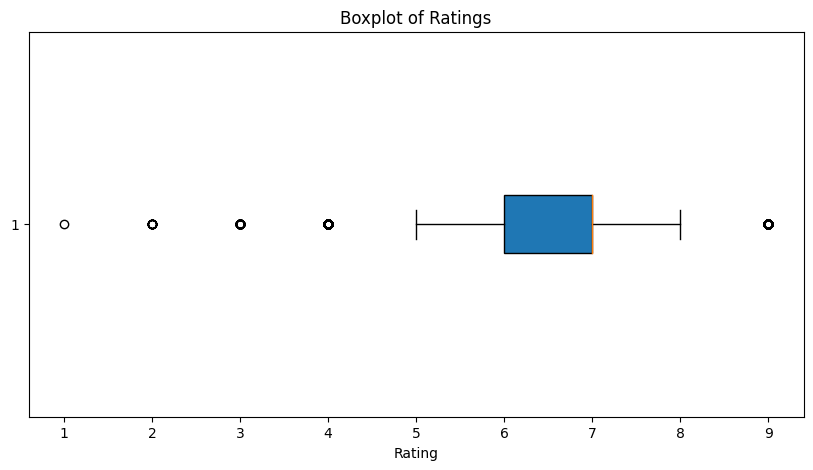

In [33]:
plt.figure(figsize=(10,5))
plt.boxplot(movies_df['RATING'], vert=False, patch_artist=True)
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()

In [34]:
movies_df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,DIRECTOR
0,Söderkåkar,(1932),Comedy,5.0,The movie version of Gideon Wahlbergs comedy a...,"Stars:Gideon Wahlberg, Dagmar Ebbesen, Björn B...",59.0,87.0,Weyler Hildebrand
1,Scarface,(1932),"Action, Crime, Drama",8.0,An ambitious and nearly insane violent gangste...,"Stars:Paul Muni, Ann Dvorak, Karen Morley, Osg...",26365.0,93.0,"Howard Hawks, Richard Rosson"
2,Kära släkten,(1933),Comedy,5.0,The story about a Stockholm wholesaler and his...,"Stars:Gösta Ekman, Tutta Rolf, Carl Barcklind,...",36.0,94.0,Gustaf Molander
3,Karriär,(1938),Drama,5.0,A traveling theater company in Sweden. Conflic...,"Stars:Signe Hasso, Sture Lagerwall, Tollie Zel...",52.0,106.0,Schamyl Bauman
4,Dumbo,(1941),"Animation, Adventure, Drama",7.0,"Ridiculed because of his enormous ears, a youn...","Stars:Sterling Holloway, Edward Brophy, Herman...",124409.0,64.0,"Samuel Armstrong, Norman Ferguson, Wilfred Jac..."
...,...,...,...,...,...,...,...,...,...
6004,Kaos,NaN,"Comedy, Drama, Fantasy",7.0,A modern day contemporary retelling of Greek m...,,20830.0,60.0,
6005,Cuckoo Song,NaN,"Drama, Horror, Mystery",7.0,"In the haunting aftermath of war, a missing gi...",,20830.0,60.0,
6006,Open 24/7,NaN,Drama,7.0,Take a look into the lives of six people who w...,,20830.0,60.0,
6007,Archive 81,NaN,"Drama, Horror, Sci-Fi",7.0,Add a Plot,"Stars:Evan Jonigkeit, Dina Shihabi, Matt McGor...",20830.0,60.0,"Rebecca Thomas, James Wan"


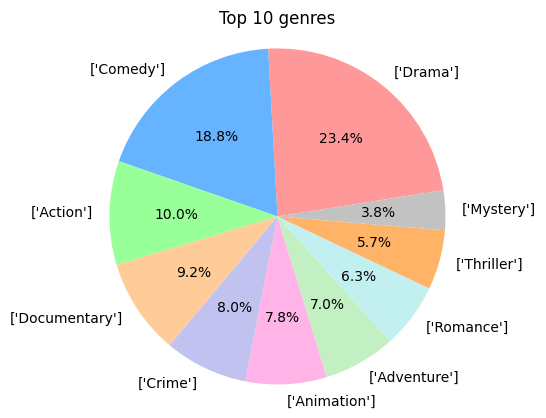

In [35]:
top_genres = movies_df['GENRE'].str.split(',').explode().str.split().value_counts()[:10]
fig,ax = plt.subplots()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#c2f0f0', '#ffb366', '#c2c2c2']
ax.pie(top_genres,labels=top_genres.index, autopct='%1.1f%%',startangle=9, colors=colors)
ax.axis('equal')

ax.set_title('Top 10 genres')
plt.show()

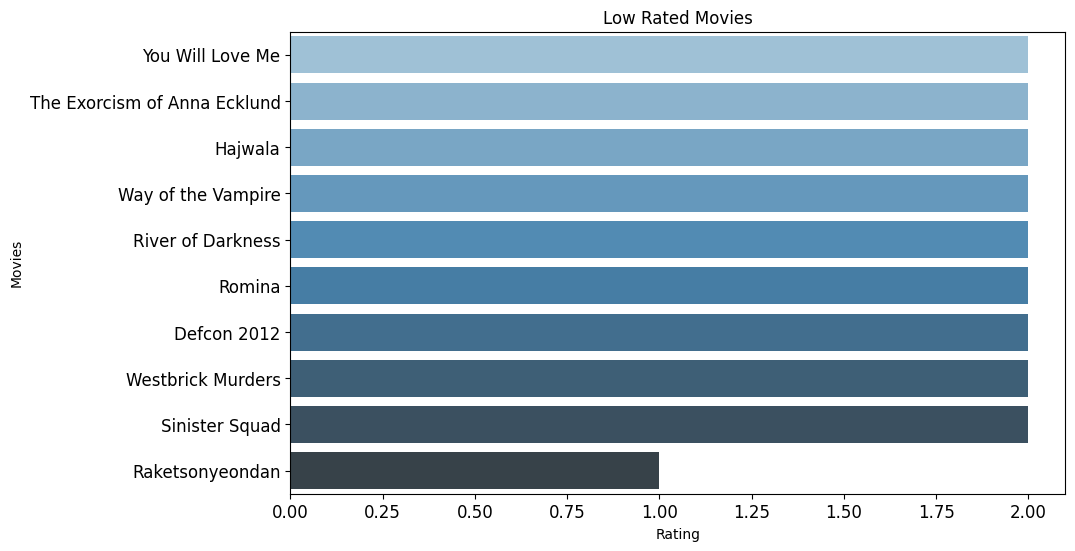

In [36]:
top_10_low_movies = movies_df.sort_values(by='RATING', ascending=False).tail(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_low_movies, x='RATING', y='MOVIES', palette='Blues_d')
plt.title('Low Rated Movies')
plt.xlabel('Rating')
plt.ylabel('Movies')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [37]:
top_10_low_movies['RATING']

1070    2.0
1905    2.0
1992    2.0
302     2.0
710     2.0
3086    2.0
574     2.0
570     2.0
1954    2.0
5472    1.0
Name: RATING, dtype: float64

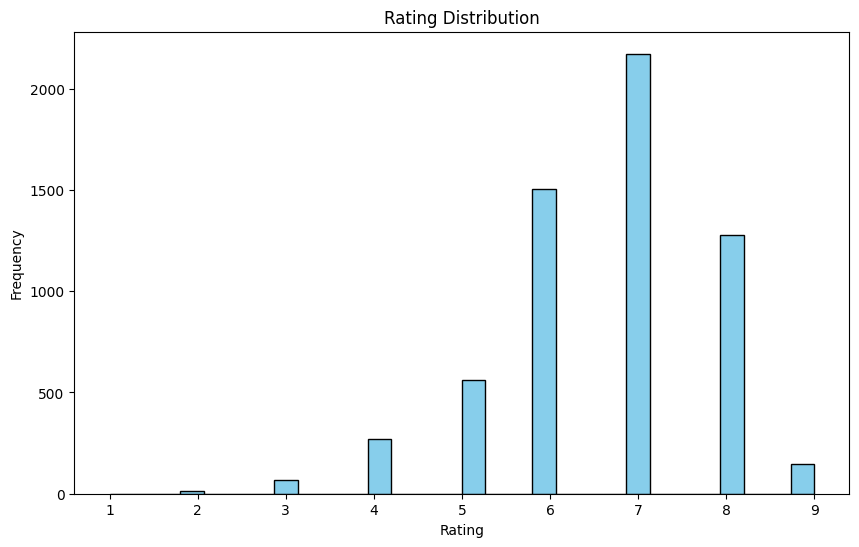

In [38]:
plt.figure(figsize=(10,6))
plt.hist(movies_df['RATING'], bins=30, color='skyblue', edgecolor='black')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')

plt.show()

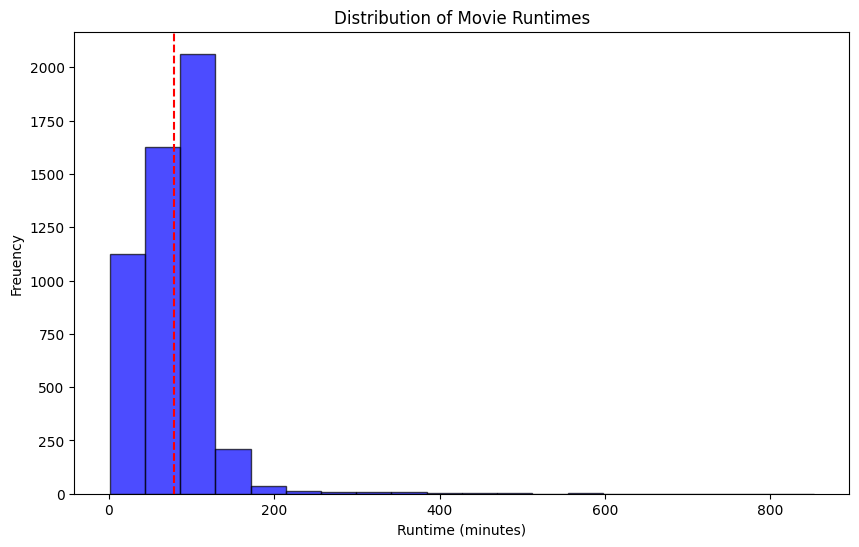

In [39]:
plt.figure(figsize=(10,6))
plt.hist(movies_df['RunTime'], bins=20, color='blue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Freuency')

mean_runtime = movies_df['RunTime'].mean()
plt.axvline(x=mean_runtime, color='red', linestyle='--',label=f'Mean Runtime: {mean_runtime:.1f} minutes')

plt.show()

In [40]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6009 entries, 0 to 6008
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    6009 non-null   object 
 1   YEAR      5990 non-null   object 
 2   GENRE     5975 non-null   object 
 3   RATING    6009 non-null   float64
 4   ONE-LINE  6009 non-null   object 
 5   STARS     6009 non-null   object 
 6   VOTES     6009 non-null   float64
 7   RunTime   5120 non-null   float64
 8   DIRECTOR  6009 non-null   object 
dtypes: float64(3), object(6)
memory usage: 422.6+ KB


In [41]:
numeric_df = movies_df[['RATING', 'RunTime', 'VOTES']]
cov_matrix = numeric_df.cov()
cov_matrix

,RATING,RunTime,VOTES
RATING,1.444254,-7.085905,1.651106e+04
RunTime,-7.085905,2268.868802,4.588530e+05
VOTES,16511.057634,458852.987711,6.343198e+09


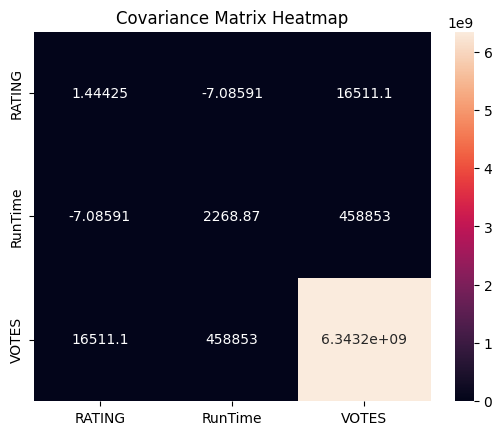

In [42]:
sns.heatmap(cov_matrix, annot=True, fmt='g')
plt.title('Covariance Matrix Heatmap')
plt.show()

In [44]:
pattern = r'\(\d{4}(-\d{4})?\)|\d{4}'

def classify_movie_or_show(year):
  if pd.notna(year) and pd.Series(year).astype(str).str.match(pattern).any():
    return 'Movie'
  else:
    return 'Show'

movies_df['Type'] = movies_df['YEAR'].apply(classify_movie_or_show)

movies_df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,DIRECTOR,Type
0,Söderkåkar,(1932),Comedy,5.0,The movie version of Gideon Wahlbergs comedy a...,"Stars:Gideon Wahlberg, Dagmar Ebbesen, Björn B...",59.0,87.0,Weyler Hildebrand,Movie
1,Scarface,(1932),"Action, Crime, Drama",8.0,An ambitious and nearly insane violent gangste...,"Stars:Paul Muni, Ann Dvorak, Karen Morley, Osg...",26365.0,93.0,"Howard Hawks, Richard Rosson",Movie
2,Kära släkten,(1933),Comedy,5.0,The story about a Stockholm wholesaler and his...,"Stars:Gösta Ekman, Tutta Rolf, Carl Barcklind,...",36.0,94.0,Gustaf Molander,Movie
3,Karriär,(1938),Drama,5.0,A traveling theater company in Sweden. Conflic...,"Stars:Signe Hasso, Sture Lagerwall, Tollie Zel...",52.0,106.0,Schamyl Bauman,Movie
4,Dumbo,(1941),"Animation, Adventure, Drama",7.0,"Ridiculed because of his enormous ears, a youn...","Stars:Sterling Holloway, Edward Brophy, Herman...",124409.0,64.0,"Samuel Armstrong, Norman Ferguson, Wilfred Jac...",Movie
...,...,...,...,...,...,...,...,...,...,...
6004,Kaos,NaN,"Comedy, Drama, Fantasy",7.0,A modern day contemporary retelling of Greek m...,,20830.0,60.0,,Show
6005,Cuckoo Song,NaN,"Drama, Horror, Mystery",7.0,"In the haunting aftermath of war, a missing gi...",,20830.0,60.0,,Show
6006,Open 24/7,NaN,Drama,7.0,Take a look into the lives of six people who w...,,20830.0,60.0,,Show
6007,Archive 81,NaN,"Drama, Horror, Sci-Fi",7.0,Add a Plot,"Stars:Evan Jonigkeit, Dina Shihabi, Matt McGor...",20830.0,60.0,"Rebecca Thomas, James Wan",Show


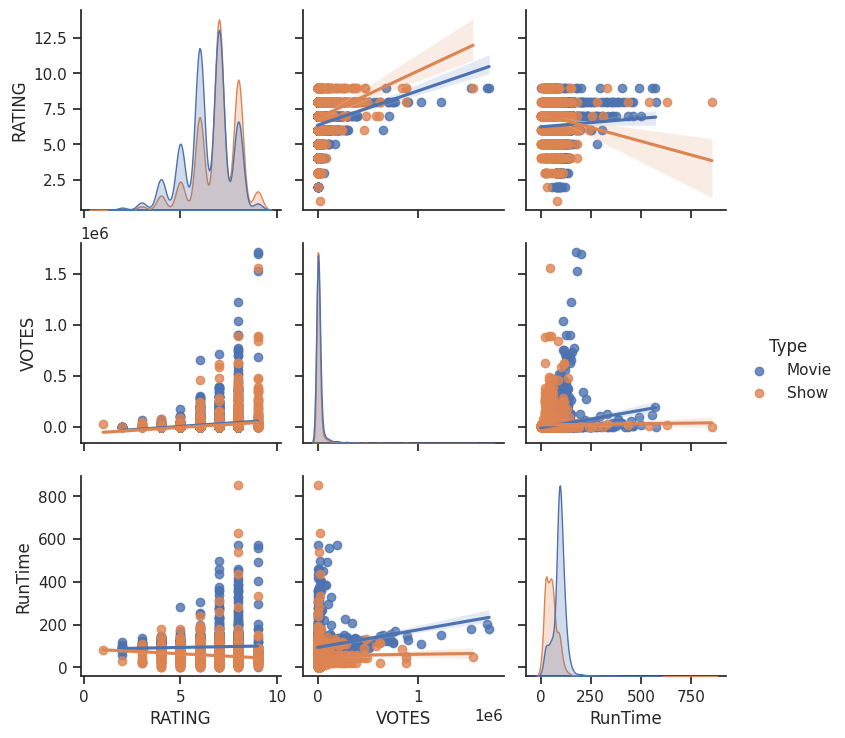

In [45]:
sns.set(style='ticks')
sns.pairplot(movies_df, hue='Type', kind='reg')

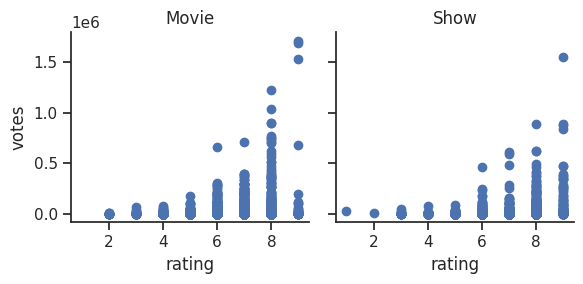

In [48]:
g = sns.FacetGrid(movies_df, col='Type')
g.map(plt.scatter,'RATING','VOTES')
g.set_axis_labels("rating","votes")
g.set_titles(col_template="{col_name}")
plt.tight_layout()
plt.show()

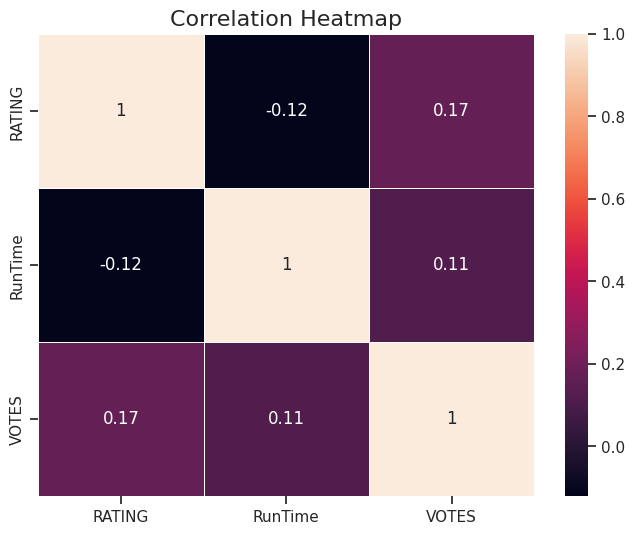

In [49]:
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, linewidth=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()